## Данные
Date — дата\
AveragePrice — средняя цена одного авокадо\
Total Volume — количество проданных авокадо\
4046 — количество проданных авокадо PLU* 4046\
4225 — количество проданных авокадо PLU 4225\
4770 — количество проданных авокадо PLU 4770\
Total Bags — всего упаковок\
Small Bags — маленькие упаковки\
Large Bags — большие\
XLarge Bags — очень большие\
type — обычный или органический\
year — год\
Region — город или регион the city or region of the observation\
*PLU — код товара (Product Lookup code)

## Задачи:
Посчитать среднюю цену методом скользящего среднего авокадо органичегоского типа в регионе Чикаго\
Посчитать среднюю цену методом экспоненциального среднего авокадо органичегоского типа в регионе Чикаго\

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [2]:
sns.set(font_scale = 1.5, style = 'darkgrid', rc = {'figure.figsize':(21, 8)})

In [3]:
adf = pd.read_csv('../Lesson 6/avocado_full.csv', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: '../Lesson 6/avocado_full.csv'

In [ ]:
adf

In [ ]:
ro4=adf

In [ ]:
ro4 = adf.query("region=='Chicago' & type=='organic'").AveragePrice.rolling(4).mean().reset_index() 
#расчет скользящего среднего по средней цене

In [ ]:
ro4

In [63]:
ro4['Date'] = pd.to_datetime(ro4.Date)

C:\Users\Jafar\AppData\Local\Temp\ipykernel_9936\1918503815.py:1: UserWarning:

FixedFormatter should only be used together with FixedLocator



<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

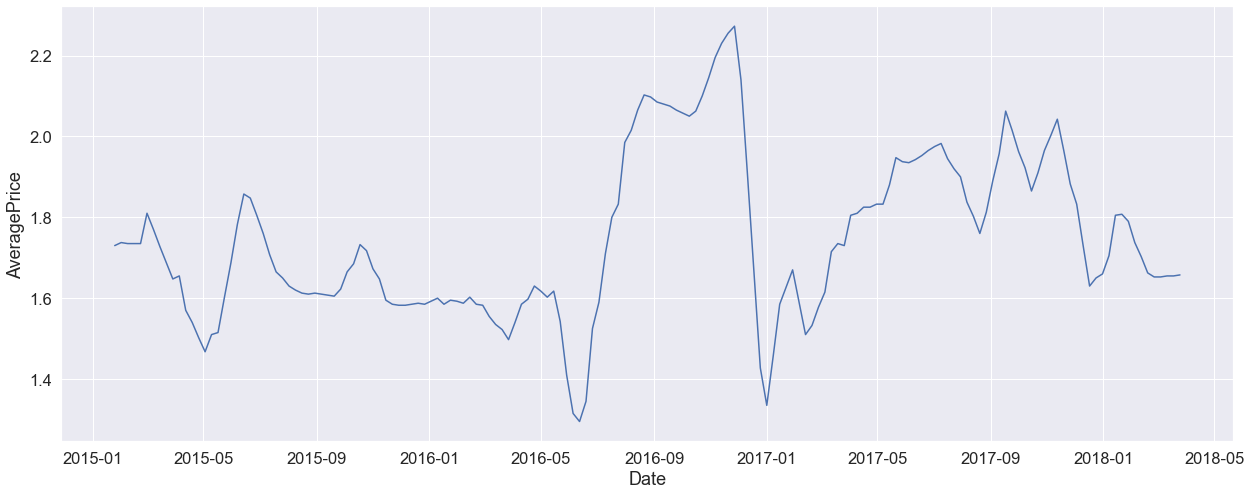

In [70]:
ax.set_xticklabels(labels=ro4.Date.dt.strftime('%Y-%m'), rotation=45, ha='right')
sns.lineplot(data = ro4, x="Date", y="AveragePrice")
#график распределения скользящего среднего цены авокадо за все время

In [ ]:
ex4

In [ ]:
ex4=adf

In [ ]:
ex4 = adf.query("region=='Chicago' & type=='organic'").AveragePrice.ewm(span=4).mean().reset_index()
#расчет экспоненциального среднего по средней цене

In [77]:
ex4['Date'] = pd.to_datetime(ex4.Date)
ex4

,Date,AveragePrice
0,2015-01-04,1.490000
1,2015-01-11,1.677500
2,2015-01-18,1.745102
3,2015-01-25,1.784118
4,2015-02-01,1.669563
...,...,...
164,2018-02-25,1.676654
165,2018-03-04,1.653992
166,2018-03-11,1.656395
167,2018-03-18,1.657837


C:\Users\Jafar\AppData\Local\Temp\ipykernel_9936\2832303050.py:1: UserWarning:

FixedFormatter should only be used together with FixedLocator



<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

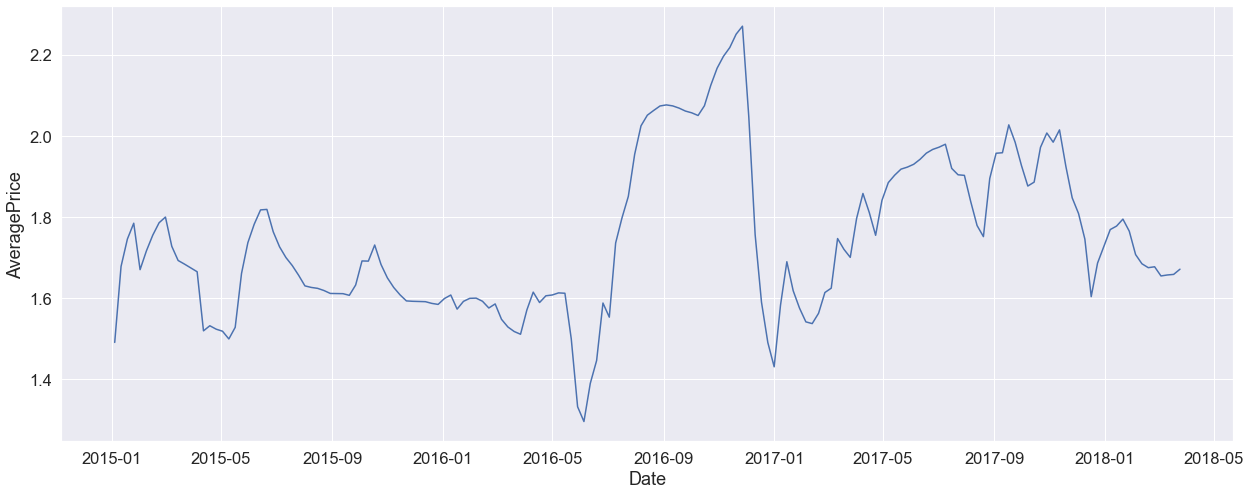

In [78]:
ax.set_xticklabels(labels=ex4.Date.dt.strftime('%Y-%m'), rotation=45, ha='right')
sns.lineplot(data = ex4, x="Date", y="AveragePrice")
#График распределения экспоненциального среднего по цене за авокадо за весь период

## Анализ заключенных сделок

В файле находится информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали.

In [15]:
sal = pd.read_csv('../Lesson 6/delays.csv')
sal['delay'] = sal.delay.str.replace('-', '') 
sal['delay'] = pd.to_timedelta(sal.delay)

In [8]:
sal.head()

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844


In [12]:
ct = pd.to_timedelta(['0 days 00:00:00.000000','1 days 00:00:00.000000', '2 days 00:00:00.000000', '3 days 00:00:00.000000', '10 days 00:00:00.000000'])
xl = ['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days']
sal['delay_categorical'] = pd.cut(sal.delay, bins = ct, labels = xl)
#присвоение категорий промежутков по времени опоздания 

In [13]:
sal.sort_values('delay_categorical').head(3)

,client_id,company_id,delay,revenue,delay_categorical
196,9092,4065,0 days 19:05:58,117130,less than 1 day
177,7924,6486,0 days 03:16:23,785967,less than 1 day
178,6909,5023,0 days 02:57:00,845869,less than 1 day


<AxesSubplot:xlabel='delay_categorical', ylabel='count'>

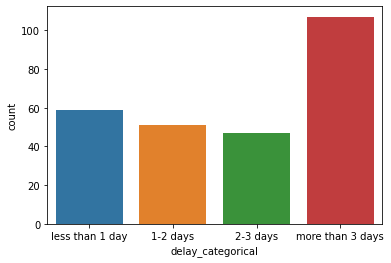

In [14]:
sns.countplot(x="delay_categorical", data=sal)
#распределение кол-ва сделок по времени опоздания